# kNN Neighborhood Classifier

In [1]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# %load ../../../data_preprocessing/functions.py
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# A function to plot a matrix
def plot_image(data, colorspace='binary'):
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.add_subplot(111)
    ax.imshow(data, cmap=colorspace)
    
    
def normalize_array(array):
    array_min = array.min(axis=(0, 1), keepdims=True)
    array_max = array.max(axis=(0, 1), keepdims=True)
    normalized_array = (array - array_min)/(array_max - array_min)
    
    return normalized_array

def normalize_with_preset(array, max_value, min_value):
    normalized_array = (array - min_value)/(max_value - min_value)
    
    return normalized_array


def recreate_image(labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = labels[label_idx]
            label_idx += 1
    return image

def overlay_images(image1, image2, colorspace1='binary', colorspace2='magma', transparency=0.5):
    plt.imshow(image1, cmap=colorspace1, interpolation='nearest')
    plt.imshow(image2, cmap=colorspace2, alpha=transparency, interpolation='bilinear')
    plt.show()
    
def flatten_normalize_neighbors(training_set, global_max=233, global_min=69):
    flattened_neighbors = []
    neighbors = training_set['neighbors']

    for i in range(len(neighbors)):
        numpy_array = np.array(neighbors[i]).reshape(-1, 1)
        normalized_neighbors = normalize_with_preset(numpy_array, global_max, global_min)
        flattened_neighbors.append(normalized_neighbors)
    
    return np.array(flattened_neighbors).reshape((len(flattened_neighbors), -1))

def extract_values_from_training_data_locations(training_data, image_channel):
    data_values = []
    
    for row in training_data:
        data_values.append(np.array([(image_channel[row[0], row[1]]), row[2]]))
        
    data_values = np.array(data_values)
    
    return data_values

def extract_neighborhood_values_from_training_data_locations(training_data, image_channel):
    data_values = []
    
    for row in training_data:
        data_values.append(np.array([(image_channel[row[0], row[1]]), row[2]]))
        
    data_values = np.array(data_values)
    
    return data_values

def flatten_neighbors(neighbors):
    data_values = []
    
    for neighbor in neighbors:
        #data_values.append(neighbor[0].reshape(-1, 1))
        data_values.append(neighbor[0])
    
    data_values = np.array(data_values)
    
    return data_values

## Open up the files that contain the labels

In [3]:
# training_set_file = np.load("../data/june10/training_data_with_labels.npy")
training_set_file = np.load("../data/june10/neighborhood_training_data_with_labels.npy")

In [6]:
training_set_file.shape

(670, 2)

In [7]:
flattened_neighbors = flatten_neighbors(training_set_file)

In [8]:
n_samples = flattened_neighbors.shape[0]

In [9]:
pixels = flattened_neighbors.reshape((n_samples, -1))
labels = training_set_file[:, 1]

In [14]:
flattened_neighbors[0, :, :]

array([[0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255],
       [0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255],
       [0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255],
       [0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.62745098],
       [0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.62745098],
       [0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.63137255, 0.62745098, 0.62745098],
       [0.63137255, 0.63137255, 0.63137255, 0.63137255, 0.63137255,
        0.63137255, 0.63137255, 0.62745098, 0.62745098, 0.62352941],
       [0.63137255, 0.63137255, 0.6313725

## Shuffle data and create splits

In [144]:
values_train, values_test, labels_train, labels_test = train_test_split(pixels, labels, test_size=0.15, random_state=0)

In [147]:
labels_train.shape

(569,)

## Initialize the kNN algorithm

In [112]:
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=2)

In [119]:
classifier.fit(values_train, labels_train)

ValueError: Unknown label type: 'unknown'

## Load up the orthomosaic

In [108]:
orthomosaic = np.load('../../data_preprocessing/numpy_data/lab_filtered_data.npy')

In [119]:
orthomosaic = normalize_array(orthomosaic)

In [121]:
w, h = tuple(orthomosaic.shape)

In [122]:
flattened_image_array = (orthomosaic.flatten()).reshape(-1, 1)

## Execute a classification of unkown values

In [123]:
predicted_labels = classifier.predict(flattened_image_array)

In [125]:
t0 = time()
predicted_labels = recreate_image(predicted_labels, w, h)
print("done in %0.3fs." % (time() - t0))

done in 12.079s.


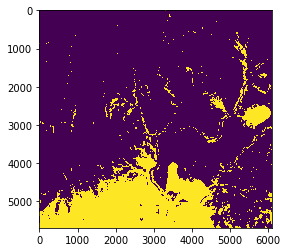

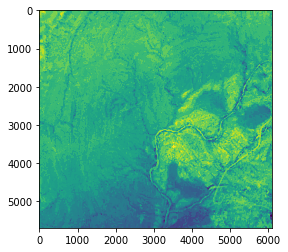

In [126]:
plt.imshow(predicted_labels)
plt.show()
plt.imshow(orthomosaic)
plt.show()